# How To Use The Sharpe Ratio For Risk-Adjusted Returns

The Sharpe ratio tells you the “risk-adjusted” return of an investment. In other words, “how much return do you get for every unit of risk you take.” It’s a great way to compare strategies because it normalizes their returns by risk.

If you’re investing or trading, you might want to consider the Sharpe ratio as one of your performance metrics.



Without Considering The Sharpe Ratio, You Miss Important Information About The Performance.
Here’s an example:

- Stock A returned 20%
- Stock B returned 25%

Which is the better investment?

You’re going to say Stock B because it returned more. What if I told you Stock A has 10% volatility and Stock B has 70% volatility? Then it’s not so clear. The Sharpe ratio takes this into account. A Sharpe ratio over 1 is generally considered “good.”

Here's what we'll do:

- How to get stock price data
- How to compute the Sharpe ratio
- How to compare two investment options

## Step 1: Get The Data
Start by importing the libraries and getting the data. I like to use yfinance for getting stock data and NumPy for vectorizing outputs.



In [4]:
import numpy as np
import pandas as pd

from openbb_terminal.sdk import openbb

With yfinance, you can download data for more than one stock at a time. Grab data for both SPY and AAPL. With yfinance, you can download data for more than one stock at a time. Grab data for both SPY and AAPL.



In [5]:
closes = openbb.economy.index(["SPY", "AAPL"], start_date="2020-01-01", end_date="2022-07-31")

In [6]:
spy_returns = closes.SPY.pct_change().dropna()
aapl_returns = closes.AAPL.pct_change().dropna()

## Step 2: Compute The Sharpe Ratio
Creating a function for the Sharpe Ratio in Python is straightforward.

In [7]:
def sharpe_ratio(returns, adjustment_factor=0.0):
    """
    Determines the Sharpe ratio of a strategy.
    
    Parameters
    ----------
    returns : pd.Series or np.ndarray
        Daily returns of the strategy, noncumulative.
    adjustment_factor : int, float
        Constant daily benchmark return throughout the period.

    Returns
    -------
    sharpe_ratio : float

    Note
    -----
    See https://en.wikipedia.org/wiki/Sharpe_ratio for more details.
    """
    returns_risk_adj = returns - adjustment_factor
    print(returns_risk_adj.std()* np.sqrt(252))
    return (
        returns_risk_adj.mean() / returns_risk_adj.std()
    ) * np.sqrt(252)

The function takes a series of daily returns and subtracts an adjustment factor. In the original work by William Sharpe, the adjustment factor was the risk-free rate. (Since the risk-free rate has been near 0 for almost a decade, I don’t consider it in the analysis.)

Then, the function divides the mean return by the standard deviation of return. Since the function accepts daily returns, you can annualize it by multiplying by the square root of the number of trading days in the year.



## Step 3: Compare Investment Options
Compute the Sharpe Ratio for AAPL and SPY.



In [8]:
# sharpe ratio for SPY
sharpe_ratio(spy_returns)

0.2520475234210819


0.553833911763992

In [9]:
# sharpe ratio for AAPL
sharpe_ratio(aapl_returns)

0.36925196376237995


1.0165004973219407

The Sharpe ratio for AAPL is higher than for SPY. That means you got more return for every unit of risk and might be considered “better.”

It’s always useful to look at performance metrics through time because they are never static. It’s easy with Python.




0.26218277355141245
0.2668974361846806
0.26870766654194567
0.27052667059025615
0.2769356251957399
0.3042307759486575
0.3185551986287033
0.31540249949470617
0.3634506373434892
0.36359367595536024
0.4581091743982864
0.46482386231477124
0.48586425364114777
0.49408471718732433
0.49464772946016994
0.5418670472731963
0.580990377602506
0.5812231917913736
0.6373686715321797
0.7372788743427816
0.8138996640952191
0.8270679731442863
0.820731458309941
0.8194492566138903
0.832871222384233
0.8334391342960487
0.8925050415657029
0.8925125181278435
0.905055701229793
0.9107734661813431
0.9165121569020973
0.9158974668928741
0.9235229341079202
0.9262880080284142
0.9254052532332431
0.9560311424562141
0.9518471934945548
0.9538276510560957
0.9345482547337285
0.9360862780263426
0.9076401638964905
0.903063597558892
0.8930946849777436
0.8888551279922025
0.8901145972783298
0.8634182841752039
0.8416458506066635
0.835223344008137
0.7826272934235136
0.7036729858882138
0.5889633562431018
0.5834775101645635
0.5784277

<AxesSubplot:xlabel='Date'>

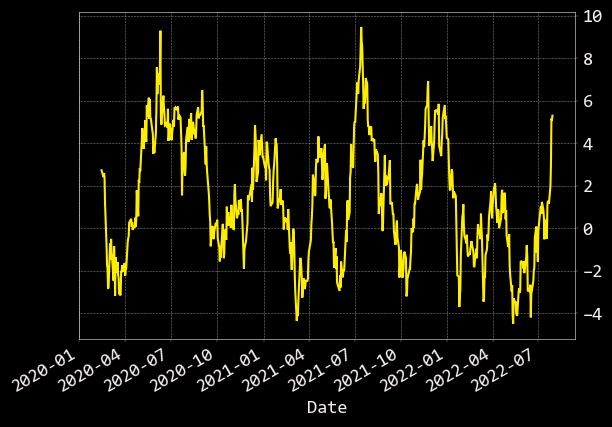

In [10]:
aapl_returns.rolling(30).apply(sharpe_ratio).plot()

Use a histogram to visualize the distribution of rolling Sharpe ratios. In the case of AAPL, there is a long tail of positive Sharpe ratios.



0.26218277355141245
0.2668974361846806
0.26870766654194567
0.27052667059025615
0.2769356251957399
0.3042307759486575
0.3185551986287033
0.31540249949470617
0.3634506373434892
0.36359367595536024
0.4581091743982864
0.46482386231477124
0.48586425364114777
0.49408471718732433
0.49464772946016994
0.5418670472731963
0.580990377602506
0.5812231917913736
0.6373686715321797
0.7372788743427816
0.8138996640952191
0.8270679731442863
0.820731458309941
0.8194492566138903
0.832871222384233
0.8334391342960487
0.8925050415657029
0.8925125181278435
0.905055701229793
0.9107734661813431
0.9165121569020973
0.9158974668928741
0.9235229341079202
0.9262880080284142
0.9254052532332431
0.9560311424562141
0.9518471934945548
0.9538276510560957
0.9345482547337285
0.9360862780263426
0.9076401638964905
0.903063597558892
0.8930946849777436
0.8888551279922025
0.8901145972783298
0.8634182841752039
0.8416458506066635
0.835223344008137
0.7826272934235136
0.7036729858882138
0.5889633562431018
0.5834775101645635
0.5784277

<AxesSubplot:>

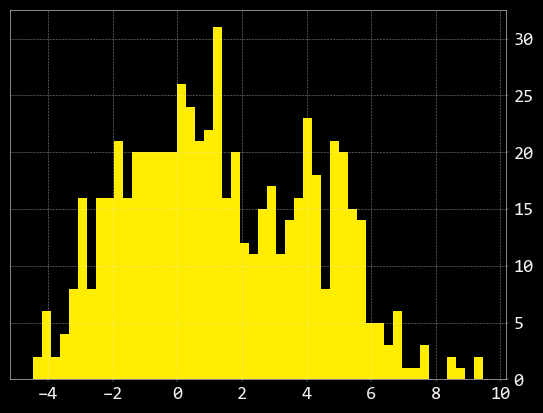

In [11]:
aapl_returns.rolling(30).apply(sharpe_ratio).hist(bins=50)

Subtract the SPY Sharpe ratio from the AAPL Sharpe ratio and plot the result as a histogram.



0.26218277355141245
0.2668974361846806
0.26870766654194567
0.27052667059025615
0.2769356251957399
0.3042307759486575
0.3185551986287033
0.31540249949470617
0.3634506373434892
0.36359367595536024
0.4581091743982864
0.46482386231477124
0.48586425364114777
0.49408471718732433
0.49464772946016994
0.5418670472731963
0.580990377602506
0.5812231917913736
0.6373686715321797
0.7372788743427816
0.8138996640952191
0.8270679731442863
0.820731458309941
0.8194492566138903
0.832871222384233
0.8334391342960487
0.8925050415657029
0.8925125181278435
0.905055701229793
0.9107734661813431
0.9165121569020973
0.9158974668928741
0.9235229341079202
0.9262880080284142
0.9254052532332431
0.9560311424562141
0.9518471934945548
0.9538276510560957
0.9345482547337285
0.9360862780263426
0.9076401638964905
0.903063597558892
0.8930946849777436
0.8888551279922025
0.8901145972783298
0.8634182841752039
0.8416458506066635
0.835223344008137
0.7826272934235136
0.7036729858882138
0.5889633562431018
0.5834775101645635
0.5784277

<AxesSubplot:>

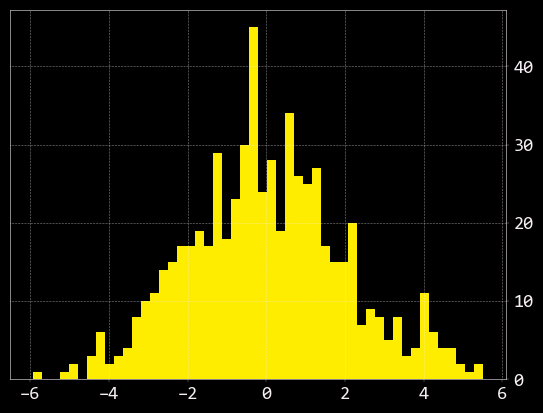

In [12]:
(
    aapl_returns.rolling(30).apply(sharpe_ratio)
    - spy_returns.rolling(30).apply(sharpe_ratio)
).hist(bins=50)

AAPL does not consistently beat SPY over every 30-day period. However, by the analysis above, you’re safe to conclude based on risk-adjusted returns, it was a better investment.